# 파생변수 생성

## 데이터 불러오기

In [195]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 999

### plant 데이터 불러오기

In [196]:
plant = pd.read_csv("data/21.savedata_plant/plant.csv")
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0


In [197]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0


### test 데이터 불러오기

In [198]:
test_data =pd.read_csv("data/21.savedata_plant/test_data.csv")
test_data.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


### weather 데이터 불러오기

In [199]:
weather = pd.read_csv("data/22.savedata_weather/aws_merge_selected.csv")
weather.rename({'tma':'mea_ddhr'}, axis='columns', inplace=True)
weather

,mea_ddhr,avg_pa,avg_ps,hr1_rn,avg_ta,avg_ws,max_ws,max_ws_wd,max_ins_ws,max_ins_ws_wd
0,2016-04-01 00:00:00,1013.3,1016.0,0.0,7.750000,0.475000,0.900000,128.300000,1.200000,142.725000
1,2016-04-01 01:00:00,1012.8,1015.5,0.0,6.675000,0.600000,0.875000,178.050000,1.175000,173.675000
2,2016-04-01 02:00:00,1012.5,1015.2,0.0,5.625000,0.550000,0.900000,182.925000,1.600000,189.175000
3,2016-04-01 03:00:00,1012.2,1014.9,0.0,5.625000,0.525000,0.975000,164.250000,1.500000,142.750000
4,2016-04-01 04:00:00,1012.3,1015.0,0.0,5.000000,0.600000,0.900000,92.800000,1.300000,133.625000
...,...,...,...,...,...,...,...,...,...,...
35059,2018-11-09 07:00:00,1013.6,1016.0,0.0,11.400000,5.600000,6.000000,261.450000,9.500000,270.000000
35060,2018-11-09 08:00:00,1013.6,1016.0,0.0,11.700000,5.350000,6.100000,262.150000,9.450000,257.350000
35061,2018-11-09 09:00:00,1013.6,1016.0,0.0,12.200000,5.050000,5.700000,290.150000,9.600000,263.000000
35062,2019-05-28 13:00:00,1013.6,1016.0,0.0,21.233333,2.833333,3.400000,298.366667,5.666667,180.000000


### sea 데이터 불러오기

In [200]:
sea = pd.read_csv("data/22.savedata_weather/sea_merge_selected.csv")
sea.rename({'tma':'mea_ddhr'}, axis='columns', inplace=True)
sea

,mea_ddhr,wd_n1,ws_n1,gust_ws_n1,pa,buoy_hm,buoy_ta,max_wh,avg_wh,lb_wd,lb_ws,lb_max_ins_wd,lb_max_iws,lb_ta,lb_ps,lb_hm
0,2016-04-01 00:00:00,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
1,2016-04-01 00:30:00,103.0,0.0,1.1,1015.3,67.0,8.8,0.0,0.0,59.0,1.5,59.0,3.0,9.4,1015.4,50.0
2,2016-04-01 01:00:00,72.0,0.0,0.7,1015.1,57.0,8.0,0.0,0.0,30.0,1.3,59.0,3.0,11.5,1015.2,29.0
3,2016-04-01 01:30:00,10.0,1.0,2.9,1015.2,44.0,8.9,0.0,0.0,14.0,3.3,10.0,4.0,12.2,1015.1,26.0
4,2016-04-01 02:00:00,46.0,3.0,4.6,1015.0,40.0,11.2,0.0,0.0,335.0,1.6,10.0,4.0,11.0,1015.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70112,2020-03-31 21:30:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,300.0,3.0,306.0,5.0,8.1,1016.1,77.0
70113,2020-03-31 22:00:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,304.0,3.8,312.0,5.0,8.2,1016.0,75.0
70114,2020-03-31 22:30:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,260.0,2.9,312.0,5.0,8.0,1016.0,77.0
70115,2020-03-31 23:00:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,296.0,2.7,312.0,5.0,7.9,1016.0,77.0


### ASOS 데이터 불러오기

In [201]:
asos = pd.read_csv('data/22.savedata_weather/ASOS_merge.csv')
asos

,MEA_DDHR,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2016-04-01 00:01:00,8.9,0.0,50.1,1.5,1012.1,1015.6,40.9,0.00,0.0
1,2016-04-01 00:02:00,8.9,0.0,50.9,1.4,1012.1,1015.6,41.1,0.00,0.0
2,2016-04-01 00:03:00,8.8,0.0,51.9,1.4,1012.1,1015.6,41.2,0.00,0.0
3,2016-04-01 00:04:00,8.8,0.0,53.1,1.4,1012.0,1015.5,41.6,0.00,0.0
4,2016-04-01 00:05:00,8.9,0.0,53.0,1.3,1012.0,1015.5,41.6,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
2056296,2020-03-31 23:55:00,8.6,0.0,40.7,0.9,1012.7,1015.8,49.9,22.01,34800.0
2056297,2020-03-31 23:56:00,8.5,0.0,35.2,1.2,1012.8,1015.9,51.2,22.01,34800.0
2056298,2020-03-31 23:57:00,8.5,0.0,52.8,1.8,1012.7,1015.8,51.4,22.01,34800.0
2056299,2020-03-31 23:58:00,8.4,0.0,61.3,0.9,1012.7,1015.8,51.5,22.01,34800.0


### sky 데이터 불러오기

In [202]:
sky = pd.read_csv('data/22.savedata_weather/sky_all_to2020.csv')
sky

,MEA_DDHR,SKY
0,2016-04-01 00:00:00,1
1,2016-04-01 01:00:00,1
2,2016-04-01 02:00:00,1
3,2016-04-01 03:00:00,2
4,2016-04-01 04:00:00,2
...,...,...
34099,2020-03-31 15:00:00,3
34100,2020-03-31 16:00:00,3
34101,2020-03-31 17:00:00,4
34102,2020-03-31 18:00:00,4


# plant 파생변수 생성

## 이슬점 추가하기

In [203]:
import sys
import numpy as np
 
# approximation valid for
# 0 degC < T < 60 degC
# 1% < RH < 100%
# 0 degC < Td < 50 degC 
 
# constants
a = 17.271
b = 237.7 # degC
def dewpoint_approximation(T,RH):
 
    Td = (b * gamma(T,RH)) / (a - gamma(T,RH))
 
    return Td
 
def gamma(T,RH):
 
    g = (a * T / (b + T)) + np.log(RH/100.0)
 
    return g
def CoilAppendDewpoint(data):
    data["DEW_POINT_COIL"] = dewpoint_approximation(data["TEM_COIL"], data["HUM_IN"])
    return data

In [204]:
plant = CoilAppendDewpoint(plant)

In [205]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477


## 내부온도 - 외부온도

In [206]:
plant["IN_OUT_TEM_D"] = plant["TEM_IN"] - plant["TEM_OUT_LOC1"]
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.00
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235,4.55
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602,3.79
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403,4.15
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477,4.21


In [207]:
plant["IN_COIL_TEM_D"] = plant["TEM_IN"] - plant["TEM_COIL"]
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.00,3.00
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235,4.55,-0.66
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602,3.79,-1.31
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403,4.15,-0.03
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477,4.21,-0.46


## HUM TEM_COIL RULL 추가

In [208]:
def addRull(data,col):
    if col == "COND_LOC":
        data["RULL_"+str(col)] = (data["TEM_COIL"] >= plant["TEM_COIL"].loc[plant[str(col)] == 1].median()) & (data["HUM_IN"] >=plant["HUM_IN"].loc[plant[str(col)] == 1].mean())
        data["RULL_"+str(col)] = data["RULL_"+str(col)].map(lambda x : int(x))
    else:
        data["RULL_"+str(col)] = (data["TEM_COIL"] >= plant["TEM_COIL"].loc[plant[str(col)] == 1].mean()) & (data["HUM_IN"] >=plant["HUM_IN"].loc[plant[str(col)] == 1].mean())
        data["RULL_"+str(col)] = data["RULL_"+str(col)].map(lambda x : int(x))

In [209]:
addRull(plant,"COND_LOC")
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.0,5.0,0
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.0,3.0,0
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.0,3.0,0
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.0,4.0,0
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.0,3.0,0


In [210]:
addRull(plant,"X24H_COND_LOC")
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.0,5.0,0,0
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.0,3.0,0,0
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.0,3.0,0,0
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.0,4.0,0,0
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.0,3.0,0,0


In [211]:
addRull(plant,"X48H_COND_LOC")
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.0,5.0,0,0,0
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.0,3.0,0,0,0
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.0,3.0,0,0,0
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.0,4.0,0,0,0
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.0,3.0,0,0,0


## 데이터 시계열 특성 추가
### 데이터 형식 바꿔주기

In [212]:
def changeToDatatime(data):
    data["MEA_DDHR"] = pd.to_datetime(data['MEA_DDHR'])
    data['X24H_TMA'] = pd.to_datetime(data['X24H_TMA'])
    data['X48H_TMA'] = pd.to_datetime(data['X48H_TMA'])
    return data

In [213]:
plant = changeToDatatime(plant)
plant.dtypes

MEA_DDHR              datetime64[ns]
PLANT                          int64
LOC                            int64
TEM_IN                       float64
HUM_IN                       float64
TEM_COIL                     float64
TEM_OUT_LOC1                 float64
HUM_OUT_LOC1                 float64
COND_LOC                     float64
X24H_TMA              datetime64[ns]
X24H_COND_LOC                float64
X48H_TMA              datetime64[ns]
X48H_COND_LOC                float64
DEW_POINT_COIL               float64
IN_OUT_TEM_D                 float64
IN_COIL_TEM_D                float64
RULL_COND_LOC                  int64
RULL_X24H_COND_LOC             int64
RULL_X48H_COND_LOC             int64
dtype: object

## MONTH 데이터 추가하기

In [214]:
plant["MONTH"] = plant["MEA_DDHR"].dt.month

In [215]:
def makeMaxMinColumns(data, category,time=6, method="max"):
    """
    data = 데이터 프레임
    category = MAX,MIN 값을 구할 컬럼명 리스트
    time = 12의 배수시간들 ex) 0이면 하루 6이면 6시간별 12면 12사간별
    method = min, max 가 올 수 있음
    """
    category.extend(["date"])
    if time == 0:
        data["date"] = data["PLANT"].astype(str) + data["LOC"].astype(str)+" "+data["MEA_DDHR"].astype(str).map(lambda x : x[:10])
    else:
        data["date"] = data["PLANT"].astype(str) + data["LOC"].astype(str)+" "+data["MEA_DDHR"].astype(str).map(lambda x : x[:10]) +" "+ data["MEA_DDHR"].astype(str).map(lambda x : x[10:13]).map(lambda x : (int(x)//time+1)*time).astype(str)
    if method == "min":
        g_data =data[category].groupby(by="date").min()
    elif  method == "max":
        g_data =data[category].groupby(by="date").max()
    g_data.columns = list(map(lambda x : x +"_"+ method.upper() ,category[:-1]))
    category.extend(list(map(lambda x : x +"_" +method.upper() ,category[:-1])))
    data = pd.merge(data, g_data, on="date")
    data = data.drop(["date"], axis=1)
    
    return data

In [216]:
clist=["TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1"]
plant =makeMaxMinColumns(plant,clist,12,"max")

In [217]:
clist=["TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1"]
plant =makeMaxMinColumns(plant,clist,12,"min")

## 기상변수 추가하기

In [218]:
def changeWeatherFeature(data):
    data.columns = data.columns.str.upper()
    data['MEA_DDHR'] = pd.to_datetime(data['MEA_DDHR'])
    data = data.sort_values(by=['MEA_DDHR'])
    return data

In [219]:
weather = changeWeatherFeature(weather)
weather

,MEA_DDHR,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD
0,2016-04-01 00:00:00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725
1,2016-04-01 01:00:00,1012.8,1015.5,0.0,6.675,0.600,0.875,178.050,1.175,173.675
2,2016-04-01 02:00:00,1012.5,1015.2,0.0,5.625,0.550,0.900,182.925,1.600,189.175
3,2016-04-01 03:00:00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750
4,2016-04-01 04:00:00,1012.3,1015.0,0.0,5.000,0.600,0.900,92.800,1.300,133.625
...,...,...,...,...,...,...,...,...,...,...
34993,2020-03-31 19:00:00,1012.9,1015.3,0.0,10.950,2.450,3.150,308.325,4.575,309.450
34994,2020-03-31 20:00:00,1013.0,1015.4,0.0,9.700,1.650,2.275,317.375,3.350,306.625
34995,2020-03-31 21:00:00,1013.7,1016.1,0.0,8.850,1.775,2.250,286.600,3.500,285.525
34996,2020-03-31 22:00:00,1014.0,1016.4,0.0,8.150,1.875,2.500,284.750,3.625,295.350


In [220]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00
4,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,14.00,37.00,11.00,18.00,59.00,11.00,23.00,9.00,6.00,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-3.728437,3.75,-1.17,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46


In [221]:
weather.to_csv("data/32.finaldata_weather/aws_merge_selected.csv", index=False)

In [222]:
def etlPlantWeather(plant, weather):
    plant_weather = plant.merge(weather, how='left', left_on='MEA_DDHR', right_on='MEA_DDHR')
    plant_weather = plant_weather.interpolate(method="linear")
    return plant_weather

In [223]:
plant_weather = etlPlantWeather(plant, weather)
plant_weather

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200
4,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,14.00,37.00,11.00,18.00,59.00,11.00,23.00,9.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-3.728437,3.75,-1.17,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125


## 해상변수 추가하기

In [224]:
sea = changeWeatherFeature(sea)
sea

,MEA_DDHR,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2016-04-01 00:00:00,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
1,2016-04-01 00:30:00,103.0,0.0,1.1,1015.3,67.0,8.8,0.0,0.0,59.0,1.5,59.0,3.0,9.4,1015.4,50.0
2,2016-04-01 01:00:00,72.0,0.0,0.7,1015.1,57.0,8.0,0.0,0.0,30.0,1.3,59.0,3.0,11.5,1015.2,29.0
3,2016-04-01 01:30:00,10.0,1.0,2.9,1015.2,44.0,8.9,0.0,0.0,14.0,3.3,10.0,4.0,12.2,1015.1,26.0
4,2016-04-01 02:00:00,46.0,3.0,4.6,1015.0,40.0,11.2,0.0,0.0,335.0,1.6,10.0,4.0,11.0,1015.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70112,2020-03-31 21:30:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,300.0,3.0,306.0,5.0,8.1,1016.1,77.0
70113,2020-03-31 22:00:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,304.0,3.8,312.0,5.0,8.2,1016.0,75.0
70114,2020-03-31 22:30:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,260.0,2.9,312.0,5.0,8.0,1016.0,77.0
70115,2020-03-31 23:00:00,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,296.0,2.7,312.0,5.0,7.9,1016.0,77.0


In [225]:
sea.to_csv("data/32.finaldata_weather/sea_merge_selected.csv", index=False)

In [226]:
plant_weather_sea = etlPlantWeather(plant_weather, sea)
plant_weather_sea

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750,23.000000,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.000000,0.300000,10.0,4.0,9.8,1015.0,44.000000
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275,187.000000,2.0,3.2,1014.8,77.0,6.4,0.0,0.0,130.000000,3.700000,143.0,5.0,9.0,1014.9,55.000000
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200,186.000000,2.0,3.2,1015.7,51.0,9.6,0.0,0.0,51.000000,1.500000,143.0,5.0,8.8,1016.7,56.000000
4,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,14.00,37.00,11.00,18.00,59.00,11.00,23.00,9.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.000000,8.0,10.0,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.666667,8.0,10.1,1023.7,57.0,5.6,2.0,0.0,299.666667,8.066667,313.0,14.0,5.0,1023.2,47.333333
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,334.333333,8.0,10.2,1023.7,57.0,5.6,2.0,0.0,299.333333,8.133333,313.0,14.0,5.0,1023.2,46.666667
349315,2019-03-31 23:30:00,2,3,8.32,39.13,9.49,4.57,51.47,0.0,2019-04-01 23:30:00,0.0,2019-04-02 23:30:00,0.0,-3.728437,3.75,-1.17,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,335.000000,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.000000,8.200000,313.0,14.0,5.0,1023.2,46.000000


## ASOS변수 추가하기

In [227]:
asos['MEA_DDHR'] = pd.to_datetime(asos['MEA_DDHR'])
asos = asos.sort_values(by=['MEA_DDHR'])
asos.head()

,MEA_DDHR,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2016-04-01 00:01:00,8.9,0.0,50.1,1.5,1012.1,1015.6,40.9,0.0,0.0
1,2016-04-01 00:02:00,8.9,0.0,50.9,1.4,1012.1,1015.6,41.1,0.0,0.0
2,2016-04-01 00:03:00,8.8,0.0,51.9,1.4,1012.1,1015.6,41.2,0.0,0.0
3,2016-04-01 00:04:00,8.8,0.0,53.1,1.4,1012.0,1015.5,41.6,0.0,0.0
4,2016-04-01 00:05:00,8.9,0.0,53.0,1.3,1012.0,1015.5,41.6,0.0,0.0


In [228]:
plant_ASOS = etlPlantWeather(plant_weather_sea, asos)
plant_ASOS

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750,23.000000,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.000000,0.300000,10.0,4.0,9.8,1015.0,44.000000,7.5,0.0,345.8,0.40,1011.4,1014.9,40.30,0.000,0.0
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275,187.000000,2.0,3.2,1014.8,77.0,6.4,0.0,0.0,130.000000,3.700000,143.0,5.0,9.0,1014.9,55.000000,3.7,0.0,76.0,0.40,1011.9,1015.5,66.20,0.000,0.0
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200,186.000000,2.0,3.2,1015.7,51.0,9.6,0.0,0.0,51.000000,1.500000,143.0,5.0,8.8,1016.7,56.000000,12.9,0.0,294.2,0.70,1013.2,1016.7,41.20,1.390,6960.0
4,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,14.00,37.00,11.00,18.00,59.00,11.00,23.00,9.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,10.2,0.0,320.0,0.55,1012.3,1015.8,40.75,0.695,3480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350446,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.000000,8.0,10.0,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,3.4,0.0,319.3,3.50,1020.8,1024.0,55.30,22.300,36600.0
350447,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.666667,8.0,10.1,1023.7,57.0,5.6,2.0,0.0,299.666667,8.066667,313.0,14.0,5.0,1023.2,47.333333,3.1,0.0,314.6,2.60,1020.8,1024.1,57.80,22.300,36600.0
350448,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,334.333333,8.0,10.2,1023.7,57.0,5.6,2.0,0.0,299.33333

In [229]:
plant_ASOS[plant_ASOS.duplicated(keep=False)]

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
19282,2017-03-01 01:00:00,1,1,9.05,37.70,8.00,3.56,47.77,0.0,2017-03-02 01:00:00,0.0,2017-03-03 01:00:00,0.0,-5.553528,5.49,1.05,0,0,0,3,9.30,42.67,8.04,10.34,52.90,7.95,37.24,7.77,3.04,32.05,1019.900000,1022.700000,0.000000,3.4250,1.900000,2.35,162.775000,3.700000,158.2000,174.000000,2.000000,3.600000,1022.500000,93.000000,2.800000,0.0,0.0,120.000000,2.500000,122.0,3.0,4.800000,1022.1,76.000000,1.0,0.0,168.0,0.9,1019.2,1022.9,77.2,0.0,0.0
19283,2017-03-01 01:00:00,1,1,9.05,37.70,8.00,3.56,47.77,0.0,2017-03-02 01:00:00,0.0,2017-03-03 01:00:00,0.0,-5.553528,5.49,1.05,0,0,0,3,9.30,42.67,8.04,10.34,52.90,7.95,37.24,7.77,3.04,32.05,1019.900000,1022.700000,0.000000,3.4250,1.900000,2.35,162.775000,3.700000,158.2000,174.000000,2.000000,3.600000,1022.500000,93.000000,2.800000,0.0,0.0,120.000000,2.500000,122.0,3.0,4.800000,1022.1,76.000000,1.0,0.0,168.0,0.9,1019.2,1022.9,77.2,0.0,0.0
19284,2017-03-01 02:00:00,1,1,8.81,37.24,7.89,3.28,49.76,0.0,2017-03-02 02:00:00,0.0,2017-03-03 02:00:00,0.0,-5.812641,5.53,0.92,0,0,0,3,9.30,42.67,8.04,10.34,52.90,7.95,37.24,7.77,3.04,32.05,1019.800000,1022.600000,0.000000,3.2500,1.875000,2.35,171.725000,3.425000,164.5500,165.000000,3.000000,4.600000,1021.900000,99.000000,5.200000,1.0,0.0,101.000000,2.900000,111.0,3.0,4.800000,1021.9,74.000000,0.9,0.0,0.0,0.0,1018.9,1022.6,79.8,0.0,0.0
19285,2017-03-01 02:00:00,1,1,8.81,37.24,7.89,3.28,49.76,0.0,2017-03-02 02:00:00,0.0,2017-03-03 02:00:00,0.0,-5.812641,5.53,0.92,0,0,0,3,9.30,42.67,8.04,10.34,52.90,7.95,37.24,7.77,3.04,32.05,1019.800000,1022.600000,0.000000,3.2500,1.875000,2.35,171.725000,3.425000,164.5500,165.000000,3.000000,4.600000,1021.900000,99.000000,5.200000,1.0,0.0,101.000000,2.900000,111.0,3.0,4.800000,1021.9,74.000000,0.9,0.0,0.0,0.0,1018.9,1022.6,79.8,0.0,0.0
19286,2017-03-01 03:00:00,1,1,8.44,38.55,7.85,3.04,50.79,0.0,2017-03-02 03:00:00,0.0,2017-03-03 03:00:00,0.0,-5.394721,5.40,0.59,0,0,0,3,9.30,42.67,8.04,10.34,52.90,7.95,37.24,7.77,3.04,32.05,1019.300000,1022.100000,0.000000,3.3250,1.625000,2.30,168.050000,3.150000,170.8750,185.000000,5.000000,6.100000,1021.300000,92.000000,2.800000,1.0,0.0,65.000000,3.100000,115.0,4.0,3.800000,1021.0,77.000000,0.5,0.0,0.0,0.0,1017.9,1021.6,79.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115485,2018-07-01 02:20:00,2,3,26.79,71.25,28.11,23.83,89.35,0.0,2018-07-02 02:20:00,0.0,2018-07-03 02:20:00,0.0,22.401325,2.96,-1.32,0,1,1,7,27.19,74.11,28.91,23.83,99.27,24.99,68.71,27.16,20.90,85.07,1008.066667,1010.566667,0.041667,22.8500,1.333333,2.15,126.183333,3.308333,121.4000,122.666667,0.333333,1.666667,1010.733333,93.333333,18.633333,0.0,0.0,36.666667,2.466667,16.0,6.0,22.733333,1010.4,89.333333,22.8,0.0,131.1,1.1,1007.0,1010.3,88.0,0.0,0.0
115486,2018-07-01 02:30:00,2,3,26.70,70.85,27.92,23.74,88.25,0.0,2018-07-02 02:30:00,0.0,2018-07-03 02:30:00,0.0,22.126782,2.96,-1.22,0,1,1,7,27.19,74.11,28.91,23.83,99.27,24.99,68.71,27.16,20.90,85.07,1008.000000,1010.500000,0.062500,22.7875,1.337500,2.20,118.375000,3.387500,115.6625,110.000000,0.000000,1.500000,1010.700000,93.000000,18.400000,0.0,0.0,41.000000,2.400000,16.0,6.0,22.700000,1010.4,89.0000

In [230]:
plant_ASOS = plant_ASOS.drop_duplicates()
plant_ASOS.shape

(349317, 63)

In [231]:
plant_ASOS.isnull().sum()

MEA_DDHR          0
PLANT             0
LOC               0
TEM_IN            0
HUM_IN            0
                 ..
ASOS_PRESS        1
ASOS_SEA_PRESS    1
ASOS_HUMID        1
ASOS_SOLAR_RAD    1
ASOS_SUNSHINE     1
Length: 63, dtype: int64

In [232]:
plant_ASOS = plant_ASOS.fillna(method='bfill')
plant_ASOS.isnull().sum().sum()

0

## sky변수 추가하기

In [233]:
sky['MEA_DDHR'] = pd.to_datetime(sky['MEA_DDHR'])
sky = sky.sort_values(by=['MEA_DDHR'])
sky.head()

,MEA_DDHR,SKY
0,2016-04-01 00:00:00,1
1,2016-04-01 01:00:00,1
2,2016-04-01 02:00:00,1
3,2016-04-01 03:00:00,2
4,2016-04-01 04:00:00,2


In [234]:
plant_sky = plant_ASOS.merge(sky, how='left', left_on='MEA_DDHR', right_on='MEA_DDHR')
plant_sky

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,7.5,0.0,345.8,0.40,1011.4,1014.9,40.30,0.000,0.0,1.0
1,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.250,1.500,142.750,23.000000,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.000000,0.300000,10.0,4.0,9.8,1015.0,44.000000,7.5,0.0,345.8,0.40,1011.4,1014.9,40.30,0.000,0.0,2.0
2,2016-04-01 06:00:00,1,1,13.00,33.00,10.00,6.00,56.00,0.0,2016-04-02 06:00:00,0.0,2016-04-03 06:00:00,0.0,-5.530449,7.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1012.3,1015.0,0.0,4.200,1.150,1.700,179.850,2.625,172.275,187.000000,2.0,3.2,1014.8,77.0,6.4,0.0,0.0,130.000000,3.700000,143.0,5.0,9.0,1014.9,55.000000,3.7,0.0,76.0,0.40,1011.9,1015.5,66.20,0.000,0.0,4.0
3,2016-04-01 09:00:00,1,1,13.00,33.00,10.00,18.00,30.00,0.0,2016-04-02 09:00:00,0.0,2016-04-03 09:00:00,0.0,-5.530449,-5.00,3.00,0,0,0,4,16.00,33.00,11.00,18.00,59.00,13.00,24.00,10.00,6.00,30.00,1013.5,1016.2,0.0,10.575,0.775,1.275,208.075,2.150,203.200,186.000000,2.0,3.2,1015.7,51.0,9.6,0.0,0.0,51.000000,1.500000,143.0,5.0,8.8,1016.7,56.000000,12.9,0.0,294.2,0.70,1013.2,1016.7,41.20,1.390,6960.0,4.0
4,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,14.00,37.00,11.00,18.00,59.00,11.00,23.00,9.00,6.00,30.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.300,1.200,142.725,143.000000,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.000000,0.800000,60.0,4.0,9.0,1015.7,55.000000,10.2,0.0,320.0,0.55,1012.3,1015.8,40.75,0.695,3480.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,0.0,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.145921,3.57,-1.24,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.000000,8.0,10.0,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,3.4,0.0,319.3,3.50,1020.8,1024.0,55.30,22.300,36600.0,2.0
349313,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,0.0,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.928584,3.54,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,333.666667,8.0,10.1,1023.7,57.0,5.6,2.0,0.0,299.666667,8.066667,313.0,14.0,5.0,1023.2,47.333333,3.1,0.0,314.6,2.60,1020.8,1024.1,57.80,22.300,36600.0,NaN
349314,2019-03-31 23:20:00,2,3,8.29,38.92,9.60,4.66,51.01,0.0,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.701684,3.63,-1.31,0,0,0,3,10.92,39.62,10.56,9.66,53.14,8.26,22.22,9.49,4.47,25.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.700,5.775,298.125,334.

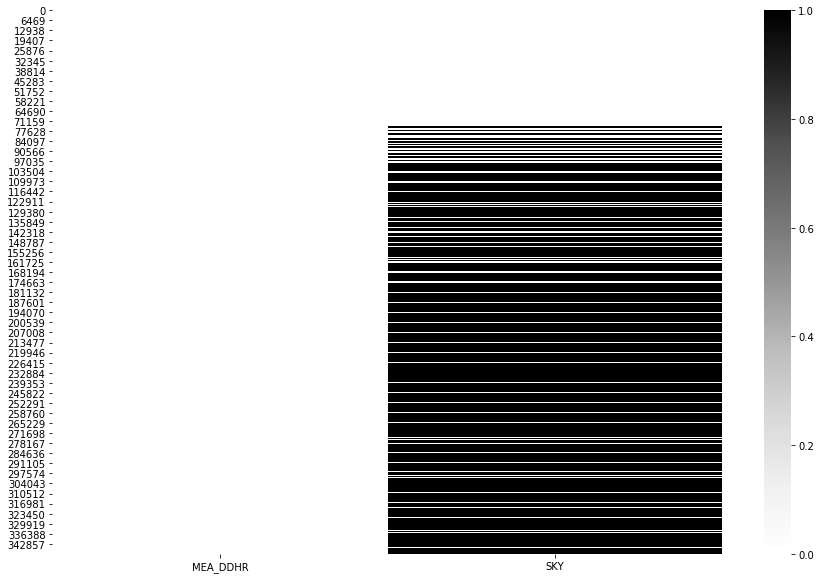

In [235]:
plt.figure(figsize=(15,10))
sns.heatmap(plant_sky[['MEA_DDHR', 'SKY']].isnull(), cmap='Greys')

In [236]:
plant_sky.isnull().mean().tail(2)

ASOS_SUNSHINE    0.00000
SKY              0.63404
dtype: float64

In [237]:
plant_sky = plant_sky.fillna(method='ffill')
plant_sky.isnull().sum().sum()

0

# test 파생변수 생성

## 이슬점 추가하기

In [238]:
test_data = CoilAppendDewpoint(test_data)

In [239]:
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN,-2.746664
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN,0.451055
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN,-3.505440
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN,-4.329266
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN,-11.413783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 3:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 3:00,NaN,2020-03-31 3:00,NaN,-2.487578
3535,2020-03-29 5:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 5:00,NaN,2020-03-31 5:00,NaN,-1.843282
3536,2020-03-29 7:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 7:00,NaN,2020-03-31 7:00,NaN,-2.307509
3537,2020-03-29 11:30,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30,NaN,2020-03-31 11:30,NaN,-3.401824


## HUM TEM_COIL RULL 추가

In [240]:
addRull(test_data,"COND_LOC")
test_data.head(3)

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN,-2.746664,0
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN,0.451055,0
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN,-3.505440,0


In [241]:
addRull(test_data,"X24H_COND_LOC")
test_data.head(3)

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN,-2.746664,0,0
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN,0.451055,0,0
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN,-3.505440,0,0


In [242]:
addRull(test_data,"X48H_COND_LOC")
test_data.head(3)

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN,-2.746664,0,0,0
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN,0.451055,0,0,0
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN,-3.505440,0,0,0


## 내부온도 - 외부온도

In [243]:
test_data["IN_OUT_TEM_D"] = test_data["TEM_IN"] - test_data["TEM_OUT_LOC1"]
test_data["IN_COIL_TEM_D"] = test_data["TEM_IN"] - test_data["TEM_COIL"]
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN,-2.746664,0,0,0,3.97,-1.93
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN,0.451055,0,0,0,3.94,-0.76
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN,-3.505440,0,0,0,-2.81,0.38
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN,-4.329266,0,0,0,0.00,1.46
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN,-11.413783,0,0,0,-0.73,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 3:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 3:00,NaN,2020-03-31 3:00,NaN,-2.487578,0,0,0,4.45,-2.57
3535,2020-03-29 5:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 5:00,NaN,2020-03-31 5:00,NaN,-1.843282,0,0,0,7.76,-2.55
3536,2020-03-29 7:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 7:00,NaN,2020-03-31 7:00,NaN,-2.307509,0,0,0,2.84,-1.93
3537,2020-03-29 11:30,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30,NaN,2020-03-31 11:30,NaN,-3.401824,0,0,0,0.64,1.34


## 데이터 시계열 특성 추가
### 데이터 형식 바꿔주기

In [244]:
test_data = changeToDatatime(test_data)
test_data.dtypes

MEA_DDHR              datetime64[ns]
PLANT                          int64
LOC                            int64
TEM_IN                       float64
HUM_IN                       float64
TEM_COIL                     float64
TEM_OUT_LOC1                 float64
HUM_OUT_LOC1                 float64
X24H_TMA              datetime64[ns]
X24H_COND_LOC                float64
X48H_TMA              datetime64[ns]
X48H_COND_LOC                float64
DEW_POINT_COIL               float64
RULL_COND_LOC                  int64
RULL_X24H_COND_LOC             int64
RULL_X48H_COND_LOC             int64
IN_OUT_TEM_D                 float64
IN_COIL_TEM_D                float64
dtype: object

## MONTH 데이터 추가하기

In [245]:
test_data["MONTH"] = test_data["MEA_DDHR"].dt.month

In [246]:
clist=["TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1"]
test_data =makeMaxMinColumns(test_data,clist,12,"max")

In [247]:
clist=["TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1"]
test_data =makeMaxMinColumns(test_data,clist,12,"min")

## 기상변수 추가하기

In [248]:
test_weather = etlPlantWeather(test_data, weather)
test_weather

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,0,0,0,3.97,-1.93,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.200000,1023.700000,0.0,3.150000,2.125000,2.550000,269.325000,4.250000,283.350000
1,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,0,0,0,-2.81,0.38,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.633333,1024.100000,0.0,4.958333,2.791667,3.275000,288.208333,5.533333,274.216667
2,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,0,0,0,3.94,-0.76,4,10.03,48.81,10.79,6.09,59.34,10.03,48.81,10.79,6.09,59.34,1022.066667,1024.500000,0.0,6.766667,3.458333,4.000000,307.091667,6.816667,265.083333
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0,0,0,0.00,1.46,4,12.32,34.13,10.86,12.32,28.27,12.32,34.13,10.86,12.32,28.27,1022.500000,1024.900000,0.0,8.575000,4.125000,4.725000,325.975000,8.100000,255.950000
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,0,0,0,-0.73,2.52,4,11.28,30.59,8.92,12.01,42.28,10.06,22.65,8.76,5.15,19.84,1021.566667,1023.966667,0.0,8.750000,4.091667,4.758333,311.766667,7.933333,271.891667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,0,0,0,4.45,-2.57,3,10.73,33.36,13.30,6.28,46.37,10.73,33.36,13.30,6.28,46.37,1020.500000,1023.000000,0.0,1.450000,1.225000,1.400000,252.425000,2.175000,263.025000
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,0,0,0,7.76,-2.55,3,9.15,38.86,11.70,1.39,74.33,9.15,38.86,11.70,1.39,74.33,1020.700000,1023.200000,0.0,0.175000,0.875000,1.225000,163.250000,1.525000,184.275000
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,0,0,0,2.84,-1.93,3,7.10,44.87,9.03,4.26,58.06,7.10,44.87,9.03,4.26,58.06,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.900000
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0,0,0,0.64,1.34,3,13.54,33.49,12.20,12.90,33.67,13.54,33.49,12.20,12.90,33.67,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.900000


## 해상변수 추가하기

In [249]:
test_weather_sea = etlPlantWeather(test_weather, sea)
test_weather_sea

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,0,0,0,3.97,-1.93,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.200000,1023.700000,0.0,3.150000,2.125000,2.550000,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0
1,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,0,0,0,-2.81,0.38,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.633333,1024.100000,0.0,4.958333,2.791667,3.275000,288.208333,5.533333,274.216667,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0
2,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,0,0,0,3.94,-0.76,4,10.03,48.81,10.79,6.09,59.34,10.03,48.81,10.79,6.09,59.34,1022.066667,1024.500000,0.0,6.766667,3.458333,4.000000,307.091667,6.816667,265.083333,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0,0,0,0.00,1.46,4,12.32,34.13,10.86,12.32,28.27,12.32,34.13,10.86,12.32,28.27,1022.500000,1024.900000,0.0,8.575000,4.125000,4.725000,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,0,0,0,-0.73,2.52,4,11.28,30.59,8.92,12.01,42.28,10.06,22.65,8.76,5.15,19.84,1021.566667,1023.966667,0.0,8.750000,4.091667,4.758333,311.766667,7.933333,271.891667,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,0,0,0,4.45,-2.57,3,10.73,33.36,13.30,6.28,46.37,10.73,33.36,13.30,6.28,46.37,1020.500000,1023.000000,0.0,1.450000,1.225000,1.400000,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,0,0,0,7.76,-2.55,3,9.15,38.86,11.70,1.39,74.33,9.15,38.86,11.70,1.39,74.33,1020.700000,1023.200000,0.0,0.175000,0.875000,1.225000,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,0,0,0,2.84,-1.93,3,7.10,44.87,9.03,4.26,58.06,7.10,44.87,9.03,4.26,58.06,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0,0,0,0.64,1.34,3,13.54,33.49,12.20,12.90,33.67,13.54,33.49,12.20,12.90,33.67,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0


## ASOS변수 추가하기

In [250]:
test_ASOS = etlPlantWeather(test_weather_sea, asos)
test_ASOS

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,0,0,0,3.97,-1.93,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.200000,1023.700000,0.0,3.150000,2.125000,2.550000,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0
1,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,0,0,0,-2.81,0.38,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.633333,1024.100000,0.0,4.958333,2.791667,3.275000,288.208333,5.533333,274.216667,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0
2,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,0,0,0,3.94,-0.76,4,10.03,48.81,10.79,6.09,59.34,10.03,48.81,10.79,6.09,59.34,1022.066667,1024.500000,0.0,6.766667,3.458333,4.000000,307.091667,6.816667,265.083333,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0,0,0,0.00,1.46,4,12.32,34.13,10.86,12.32,28.27,12.32,34.13,10.86,12.32,28.27,1022.500000,1024.900000,0.0,8.575000,4.125000,4.725000,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,0,0,0,-0.73,2.52,4,11.28,30.59,8.92,12.01,42.28,10.06,22.65,8.76,5.15,19.84,1021.566667,1023.966667,0.0,8.750000,4.091667,4.758333,311.766667,7.933333,271.891667,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,0,0,0,4.45,-2.57,3,10.73,33.36,13.30,6.28,46.37,10.73,33.36,13.30,6.28,46.37,1020.500000,1023.000000,0.0,1.450000,1.225000,1.400000,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,0,0,0,7.76,-2.55,3,9.15,38.86,11.70,1.39,74.33,9.15,38.86,11.70,1.39,74.33,1020.700000,1023.200000,0.0,0.175000,0.875000,1.225000,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,0,0,0,2.84,-1.93,3,7.10,44.87,9.03,4.26,58.06,7.10,44.87,9.03,4.26,58.06,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,

## sky변수 추가하기

In [251]:
test_sky = test_ASOS.merge(sky, how='left', left_on='MEA_DDHR', right_on='MEA_DDHR')
test_sky

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,0,0,0,3.97,-1.93,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.200000,1023.700000,0.0,3.150000,2.125000,2.550000,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0,1.0
1,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,0,0,0,-2.81,0.38,4,9.45,40.93,10.10,12.26,54.82,8.17,40.42,9.07,4.20,32.14,1021.633333,1024.100000,0.0,4.958333,2.791667,3.275000,288.208333,5.533333,274.216667,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0,NaN
2,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,0,0,0,3.94,-0.76,4,10.03,48.81,10.79,6.09,59.34,10.03,48.81,10.79,6.09,59.34,1022.066667,1024.500000,0.0,6.766667,3.458333,4.000000,307.091667,6.816667,265.083333,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0,NaN
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0,0,0,0.00,1.46,4,12.32,34.13,10.86,12.32,28.27,12.32,34.13,10.86,12.32,28.27,1022.500000,1024.900000,0.0,8.575000,4.125000,4.725000,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0,3.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,0,0,0,-0.73,2.52,4,11.28,30.59,8.92,12.01,42.28,10.06,22.65,8.76,5.15,19.84,1021.566667,1023.966667,0.0,8.750000,4.091667,4.758333,311.766667,7.933333,271.891667,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,0,0,0,4.45,-2.57,3,10.73,33.36,13.30,6.28,46.37,10.73,33.36,13.30,6.28,46.37,1020.500000,1023.000000,0.0,1.450000,1.225000,1.400000,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0,NaN
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,0,0,0,7.76,-2.55,3,9.15,38.86,11.70,1.39,74.33,9.15,38.86,11.70,1.39,74.33,1020.700000,1023.200000,0.0,0.175000,0.875000,1.225000,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0,NaN
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,0,0,0,2.84,-1.93,3,7.10,44.87,9.03,4.26,58.06,7.10,44.87,9.03,4.26,58.06,1021.300000,1023.800000,0.0,-0.500000,1.200000,1.650000,179.450000,2.375000,170.9000

In [252]:
test_sky.isnull().mean()

MEA_DDHR          0.000000
PLANT             0.000000
LOC               0.000000
TEM_IN            0.000000
HUM_IN            0.000000
                    ...   
ASOS_SEA_PRESS    0.000000
ASOS_HUMID        0.000000
ASOS_SOLAR_RAD    0.000000
ASOS_SUNSHINE     0.000000
SKY               0.558067
Length: 63, dtype: float64

In [253]:
test_sky = test_sky.fillna(method='ffill')
test_sky.isnull().sum()

MEA_DDHR          0
PLANT             0
LOC               0
TEM_IN            0
HUM_IN            0
                 ..
ASOS_SEA_PRESS    0
ASOS_HUMID        0
ASOS_SOLAR_RAD    0
ASOS_SUNSHINE     0
SKY               0
Length: 63, dtype: int64

# 파일 저장하기

In [254]:
# plant.to_csv("data/31.finaldata_plant/plant.csv", index=False)

In [255]:
# test_weather_sea.to_csv("data/31.finaldata_plant/test_weather_sea.csv", index=False)

In [256]:
# plant_weather_sea.to_csv("data/31.finaldata_plant/plant_weather_sea.csv", index=False)

In [257]:
# test_ASOS.to_csv("data/31.finaldata_plant/test_wsASOS.csv", index=False)

In [258]:
# plant_ASOS.to_csv("data/31.finaldata_plant/plant_wsASOS.csv", index=False)

In [259]:
test_sky.to_csv("data/31.finaldata_plant/test_wsASOSsky.csv", index=False)

In [260]:
plant_sky.to_csv("data/31.finaldata_plant/plant_wsASOSsky.csv", index=False)